In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
import pickle
#pickle_off = open("derived_data/train_data_merged.pickle","rb")
df = pd.read_pickle('derived_data/train_data_merged.pickle')
#df = pickle.load(pickle_off)

In [4]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [5]:
df.shape

(90275, 60)

/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


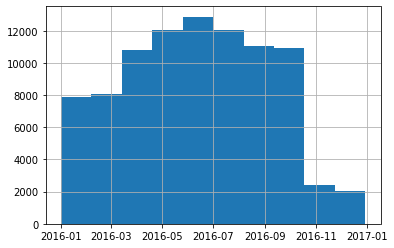

In [6]:
pd.to_datetime(df.transactiondate).hist()

In [7]:
pd.to_datetime(df.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [8]:
pd.to_datetime(df.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

In [9]:
# Check for duplicate parcelid
(df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

Explore Null Values

In [10]:
df.isnull().sum().sort_values(ascending = False).head(20)

buildingclasstypeid         90259
finishedsquarefeet13        90242
basementsqft                90232
storytypeid                 90232
yardbuildingsqft26          90180
fireplaceflag               90053
architecturalstyletypeid    90014
typeconstructiontypeid      89976
finishedsquarefeet6         89854
decktypeid                  89617
poolsizesum                 89306
pooltypeid10                89114
pooltypeid2                 89071
taxdelinquencyyear          88492
taxdelinquencyflag          88492
hashottuborspa              87910
yardbuildingsqft17          87629
finishedsquarefeet15        86711
finishedsquarefeet50        83419
finishedfloor1squarefeet    83419
dtype: int64

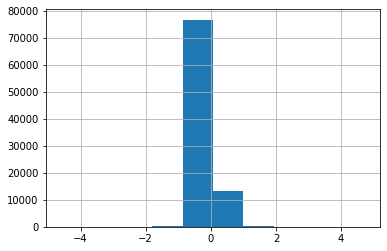

In [11]:
df.logerror.hist()

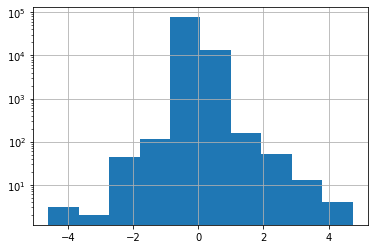

In [12]:
fig, ax = plt.subplots()
df.logerror.hist(ax=ax)
ax.set_yscale('log')

#### Check for Duplicate Records

In [13]:
# Is there one record per parcel?
df.parcelid.nunique() == len(df)

False

In [15]:
# Lets look at some which has multiple records
counts_per_parcel = df.groupby('parcelid').size()
more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]

# There are 124 of them
print(more_than_one_sale.parcelid.nunique())

# Lets have a look
more_than_one_sale.head(10)

124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
814,11005771,0.0545,2016-06-17,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
967,11183209,-0.0481,2016-01-07,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
968,11183209,-0.0070,2016-09-14,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
1164,11554091,-0.1696,2016-01-07,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
1165,11554091,-0.0954,2016-07-05,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


In [20]:
# First ensure we have acurately seperated the records
assert len(df) == len(more_than_one_sale) + len(only_one_sale)

# then remove the duplicate records by choosing a random sale from properties with more than one
reduced_df = more_than_one_sale.sample(frac=1, random_state=0).groupby('parcelid').head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

In [21]:
reduced_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


Explore Null values

In [22]:
reduced_df.isnull().sum().sort_values(ascending = False).head(20)

buildingclasstypeid         90134
finishedsquarefeet13        90117
basementsqft                90107
storytypeid                 90107
yardbuildingsqft26          90055
fireplaceflag               89930
architecturalstyletypeid    89890
typeconstructiontypeid      89852
finishedsquarefeet6         89731
decktypeid                  89492
poolsizesum                 89184
pooltypeid10                88991
pooltypeid2                 88946
taxdelinquencyyear          88375
taxdelinquencyflag          88375
hashottuborspa              87787
yardbuildingsqft17          87505
finishedsquarefeet15        86595
finishedsquarefeet50        83300
finishedfloor1squarefeet    83300
dtype: int64

In [23]:
reduced_df.isnull().sum().sort_values(ascending = True).head(20)

parcelid                        0
longitude                       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
roomcnt                         0
latitude                        0
fips                            0
bathroomcnt                     0
assessmentyear                  0
transactiondate                 0
logerror                        0
bedroomcnt                      0
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
propertycountylandusecode       1
taxamount                       6
regionidzip                    35
structuretaxvaluedollarcnt    378
censustractandblock           603
dtype: int64

In [ ]:
Explore unique values

In [24]:
reduced_df.nunique().sort_values(ascending=False).head(20)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42647
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
dtype: int64

In [26]:
reduced_df.nunique(dropna=False).sort_values(ascending=True).head(20)

assessmentyear              1
poolcnt                     2
storytypeid                 2
fireplaceflag               2
pooltypeid7                 2
pooltypeid2                 2
buildingclasstypeid         2
pooltypeid10                2
decktypeid                  2
taxdelinquencyflag          2
hashottuborspa              2
regionidcounty              3
fips                        3
typeconstructiontypeid      4
threequarterbathnbr         5
numberofstories             5
fireplacecnt                6
airconditioningtypeid       7
architecturalstyletypeid    7
buildingqualitytypeid       9
dtype: int64

In [ ]:
Inspect the target variable

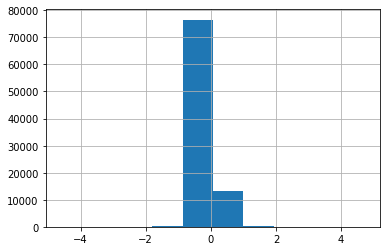

In [27]:
reduced_df.logerror.hist()

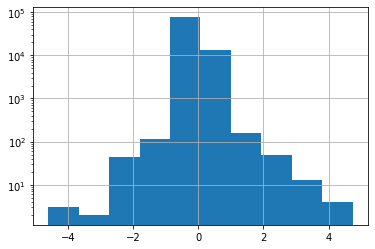

In [29]:
fig, ax = plt.subplots()
reduced_df.logerror.hist(ax=ax)
ax.set_yscale('log')